In [1]:
import pandas as pd
df = pd.read_csv("dbm",delimiter='\t',names=['id','datetime','lat','long'],low_memory=False)
df['datetime'] = pd.to_datetime(df['datetime'])
df['week'] = df['datetime'].dt.week
df2 = df[df["id"]!="DEL"]

C:\Users\soula\AppData\Local\Temp/ipykernel_1732/2732900425.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['datetime'].dt.week


In [2]:
import datetime as dt
df2['epoch'] = (df2['datetime'] - dt.datetime(2015,1,1)).dt.total_seconds()

C:\Users\soula\AppData\Local\Temp/ipykernel_1732/3205834634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['epoch'] = (df2['datetime'] - dt.datetime(2015,1,1)).dt.total_seconds()


In [3]:
df2

,id,datetime,lat,long,week,epoch
0,71694,2015-03-15 10:59:59,4.93,45.78,11,6346799.0
1,98711,2015-04-23 21:19:59,4.93,45.78,17,9753599.0
2,36438,2015-04-23 02:39:59,4.87,45.79,17,9686399.0
4,39336,2015-04-02 14:19:59,4.88,45.78,14,7913999.0
5,88530,2015-03-05 11:19:59,4.88,45.79,10,5483999.0
...,...,...,...,...,...,...
34551841,94683,2015-03-13 00:59:59,4.87,45.77,11,6137999.0
34551842,62580,2015-04-16 14:19:59,4.87,45.78,16,9123599.0
34551843,76508,2015-03-26 16:59:59,4.87,45.75,13,7318799.0
34551844,62580,2015-04-16 15:59:59,4.87,45.78,16,9129599.0


In [ ]:
for i in range(10, 21):
    print("week "+str(i))
    df2["count"]=df[(df["week"]==i) & (df['id']!='DEL')] 
    plot(df_week_clean,i)

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
def plot(df,week_number):
    large = 22; med = 16; small = 12
    params = {'axes.titlesize': large,
              'legend.fontsize': med,
              'figure.figsize': (16, 10),
              'axes.labelsize': med,
              'axes.titlesize': med,
              'xtick.labelsize': med,
              'ytick.labelsize': med,
              'figure.titlesize': large}
    plt.rcParams.update(params)
    plt.style.use('seaborn-whitegrid')
    sns.set_style("white")
    %matplotlib inline
    # Create Fig and gridspec
    fig = plt.figure(figsize=(16, 10), dpi= 80)
    grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

    # Define the axes
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
    ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
    ax_main.scatter('lat', 'long', alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)
    sns.boxplot(y=df.long, ax=ax_right)
    sns.boxplot(x=df.lat, ax=ax_bottom)
    ax_bottom.set(xlabel='')
    ax_right.set(ylabel='')
#     plt.savefig(f'week_{week_number}.png')
    plt.show()

week 10


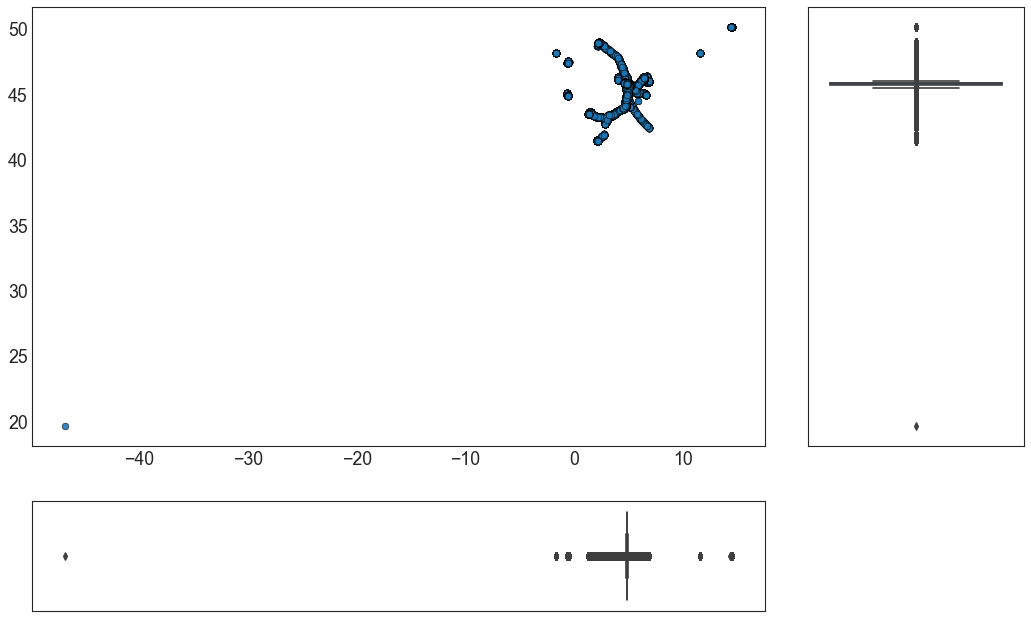

week 11


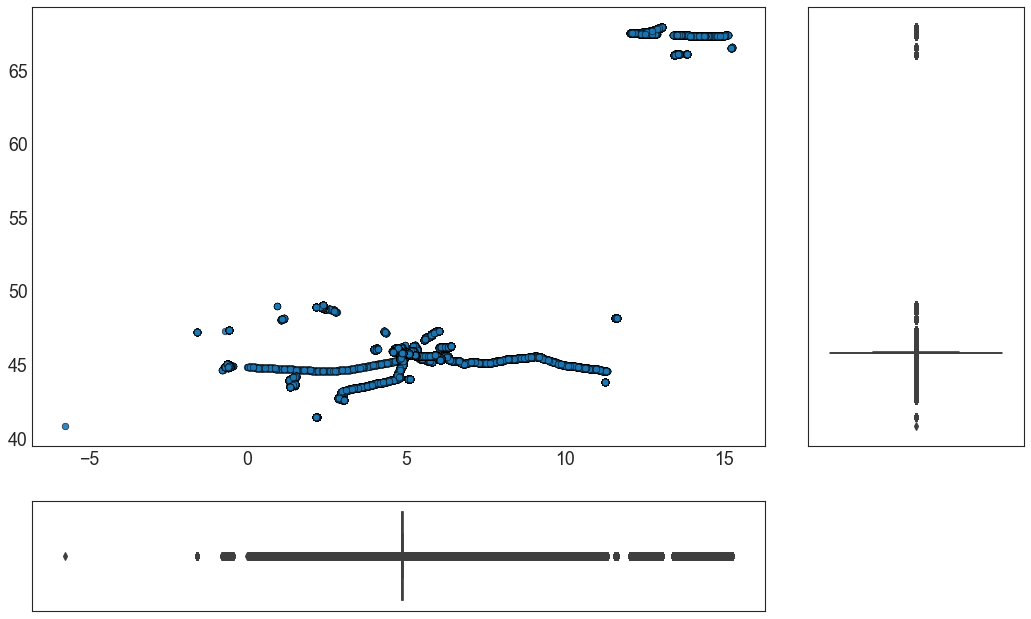

week 12


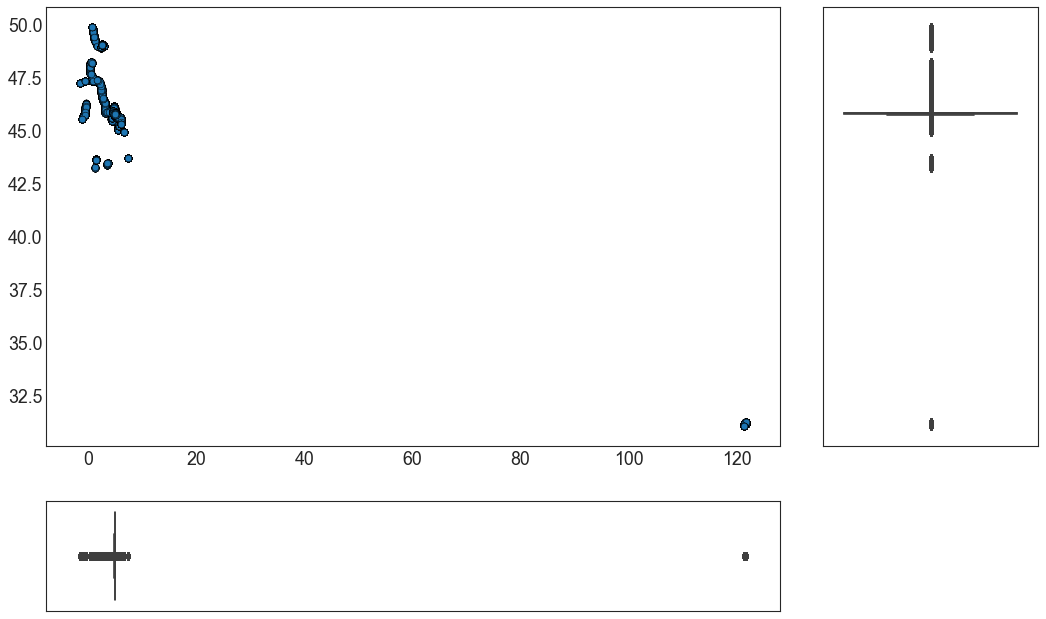

week 13


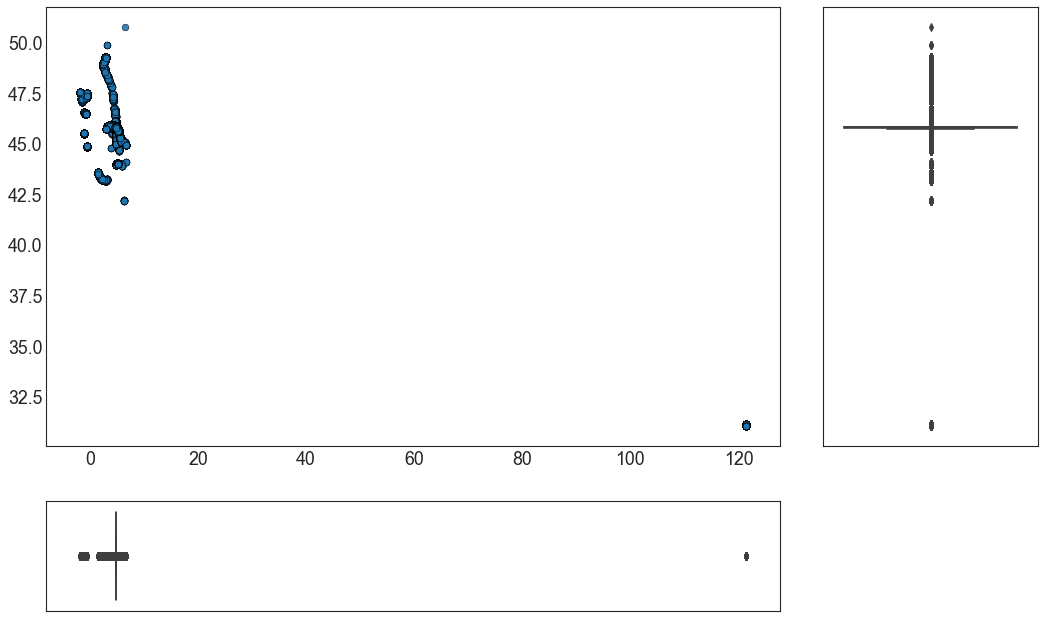

week 14


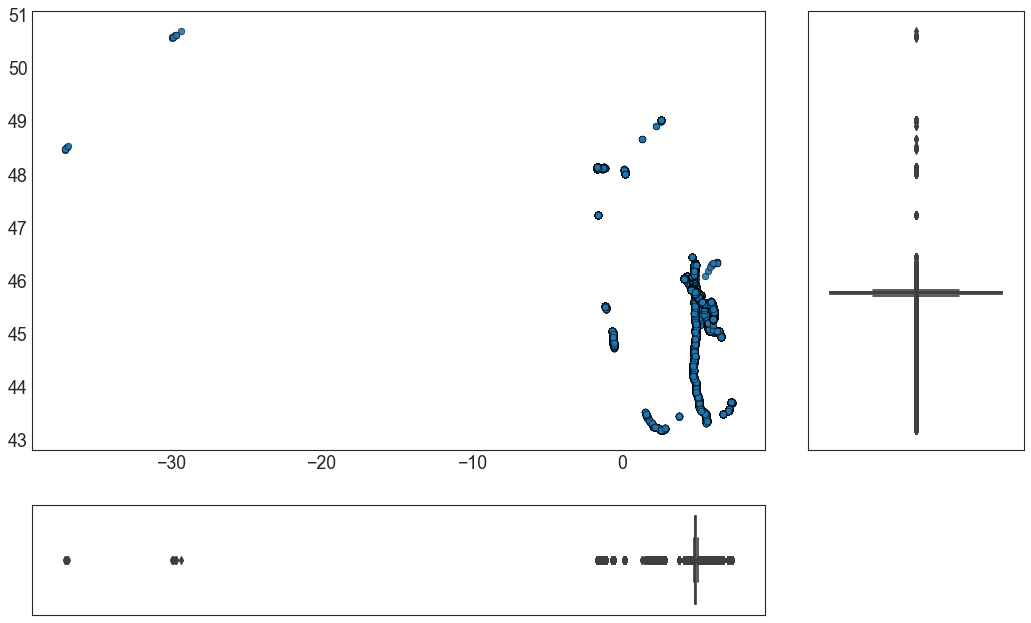

week 15


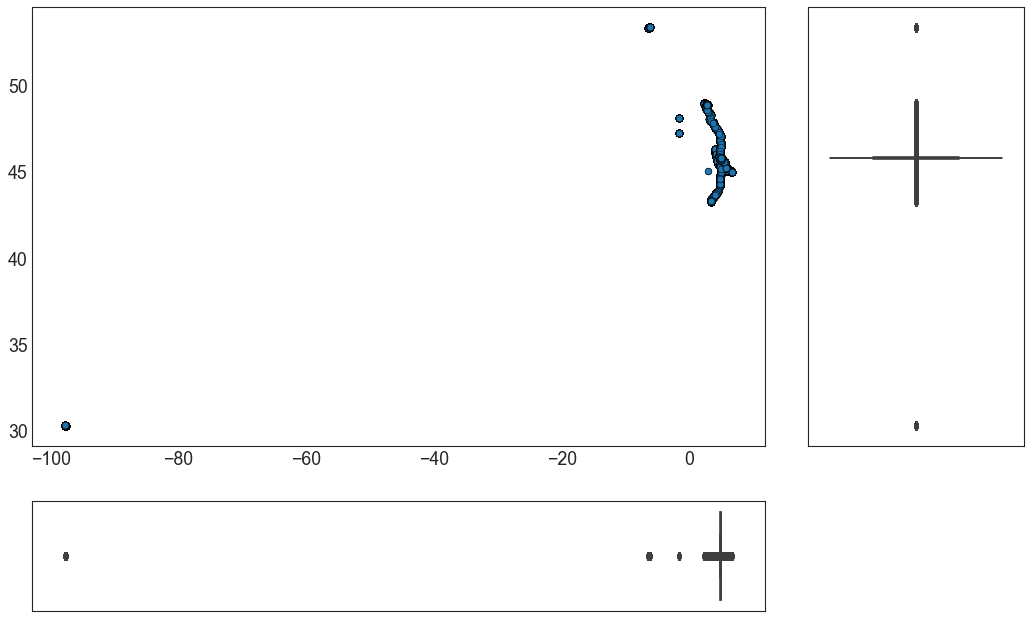

week 16


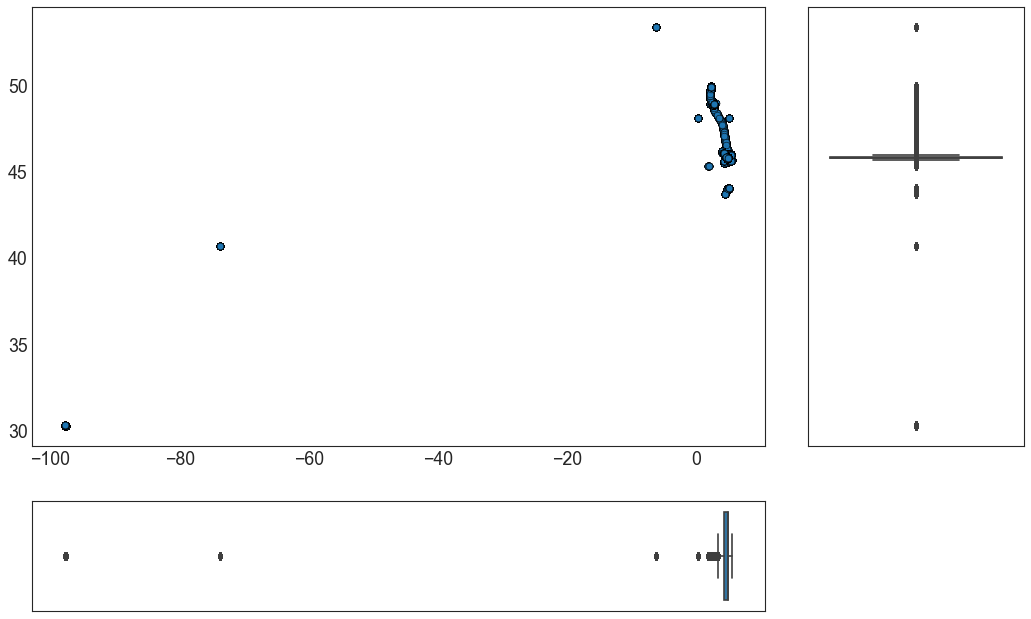

week 17


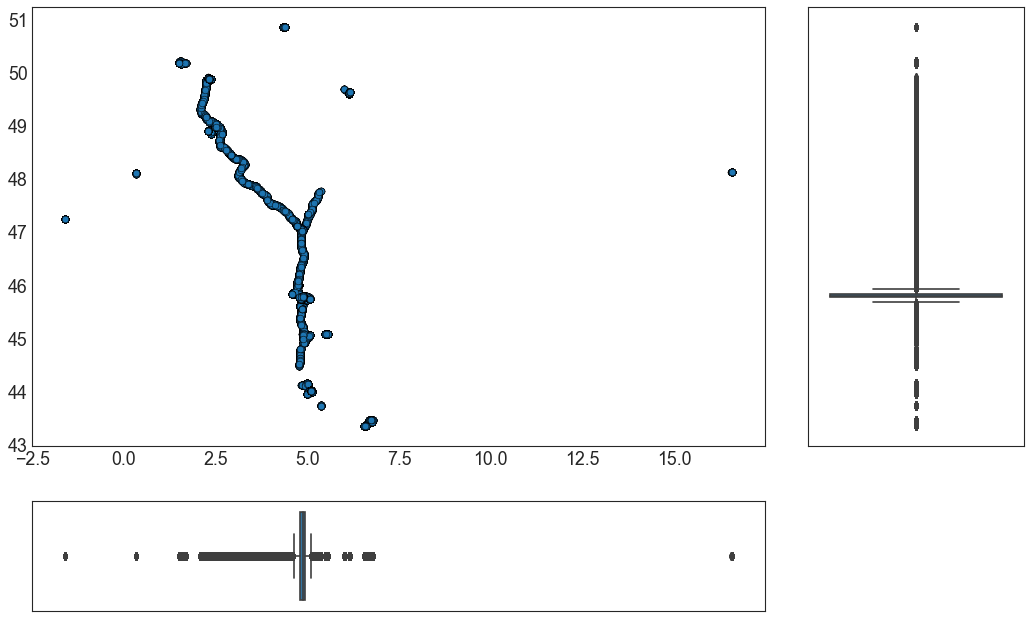

week 18


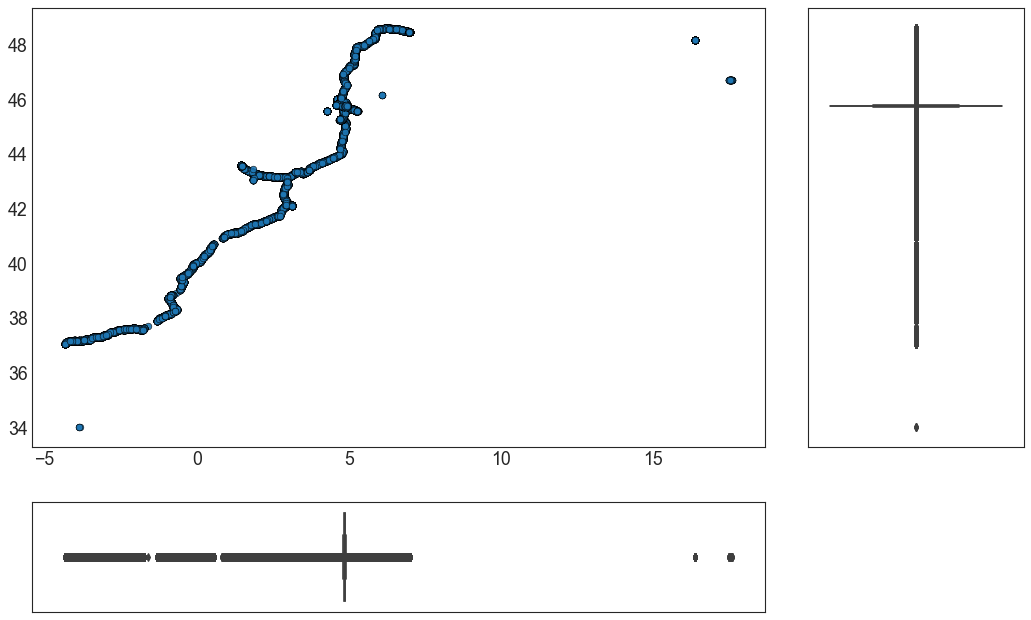

week 19


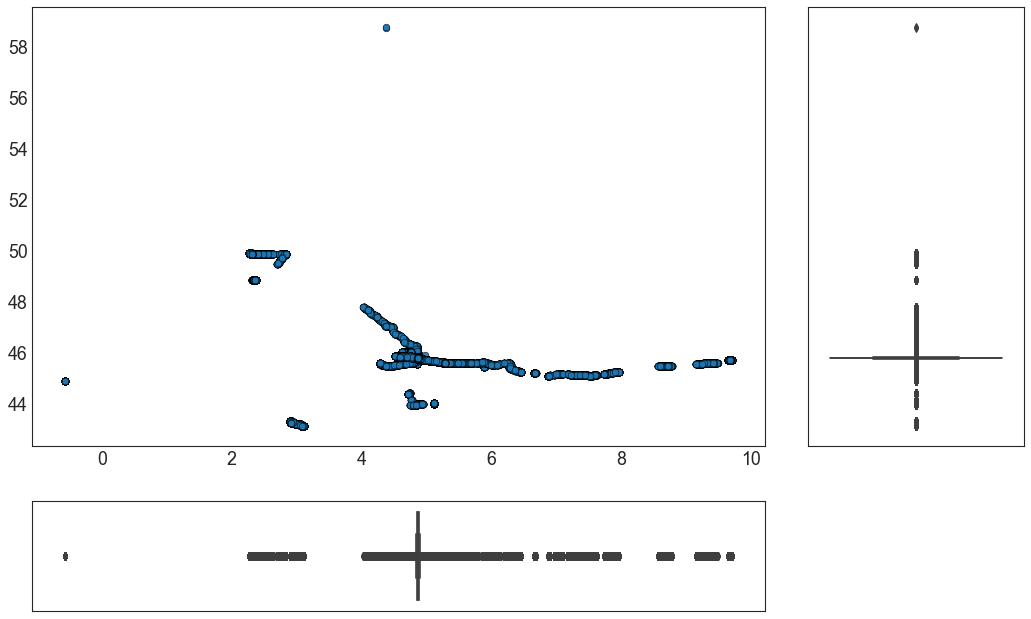

week 20


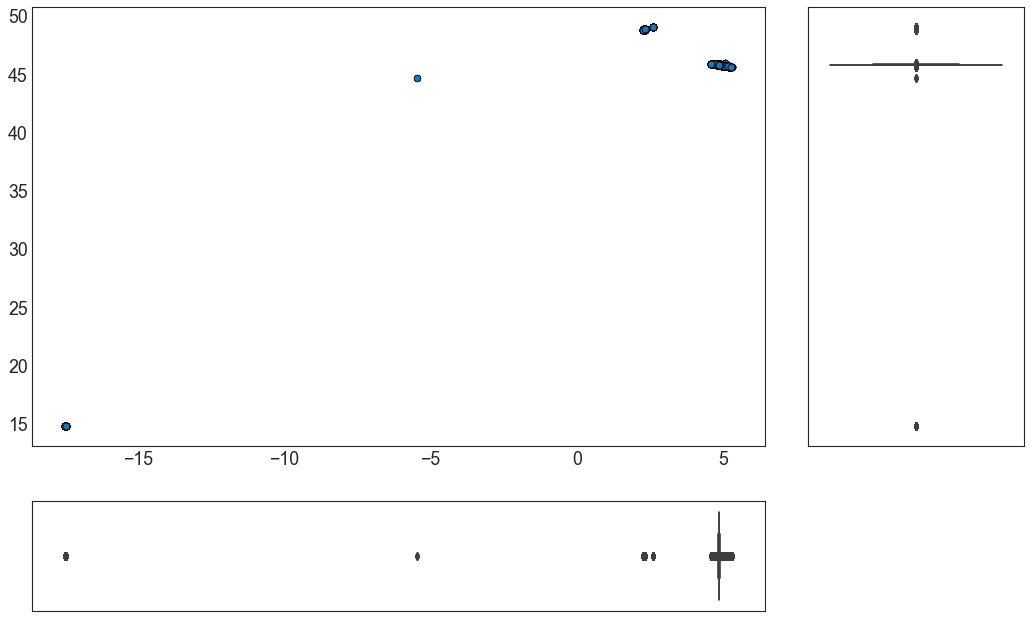

In [7]:
for i in range(10, 21):
    print("week "+str(i))
    df_week_clean=df[(df["week"]==i) & (df['id']!='DEL')] 
    plot(df_week_clean,i)

In [7]:
import matplotlib.pyplot as plt
def plotocc(df):
    fig = plt.figure(figsize=(16, 10), dpi= 80)
    ax = fig.add_axes([0,0,1,1])
    langs = df.groupby("id",as_index=False).size().sort_values("size")["id"]
    students = df.groupby("id",as_index=False).size().sort_values("size")["size"]
    ax.bar(langs,students)
    plt.show()

week 10


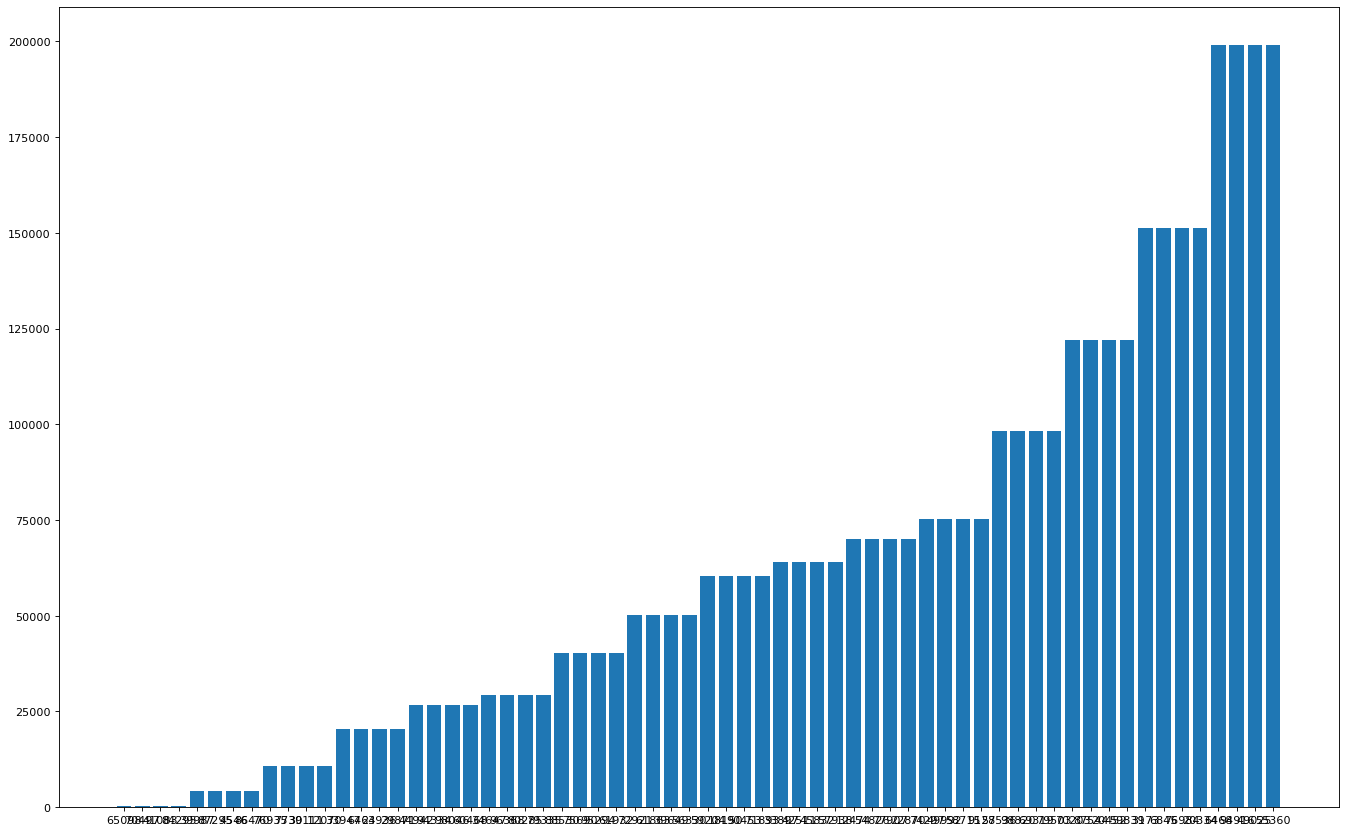

week 11


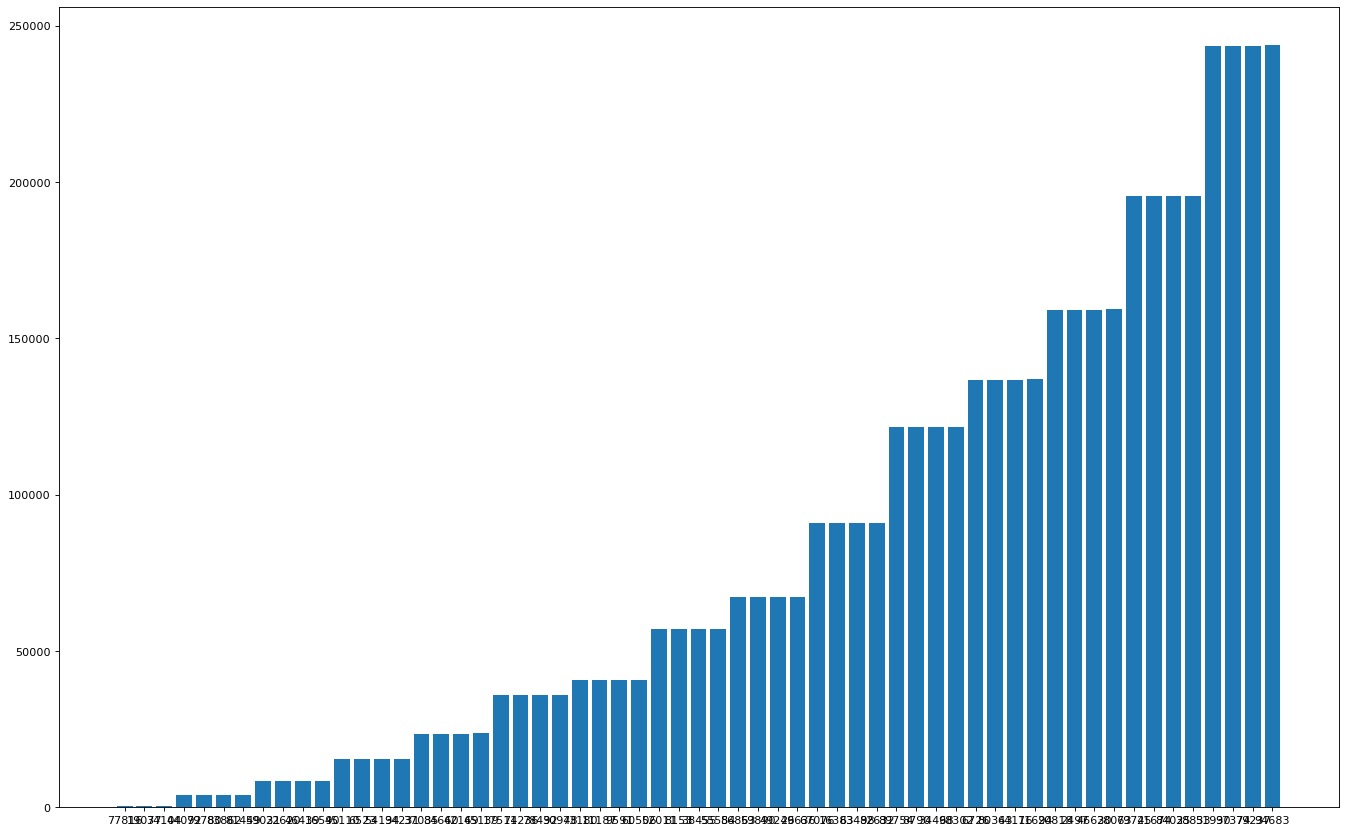

week 12


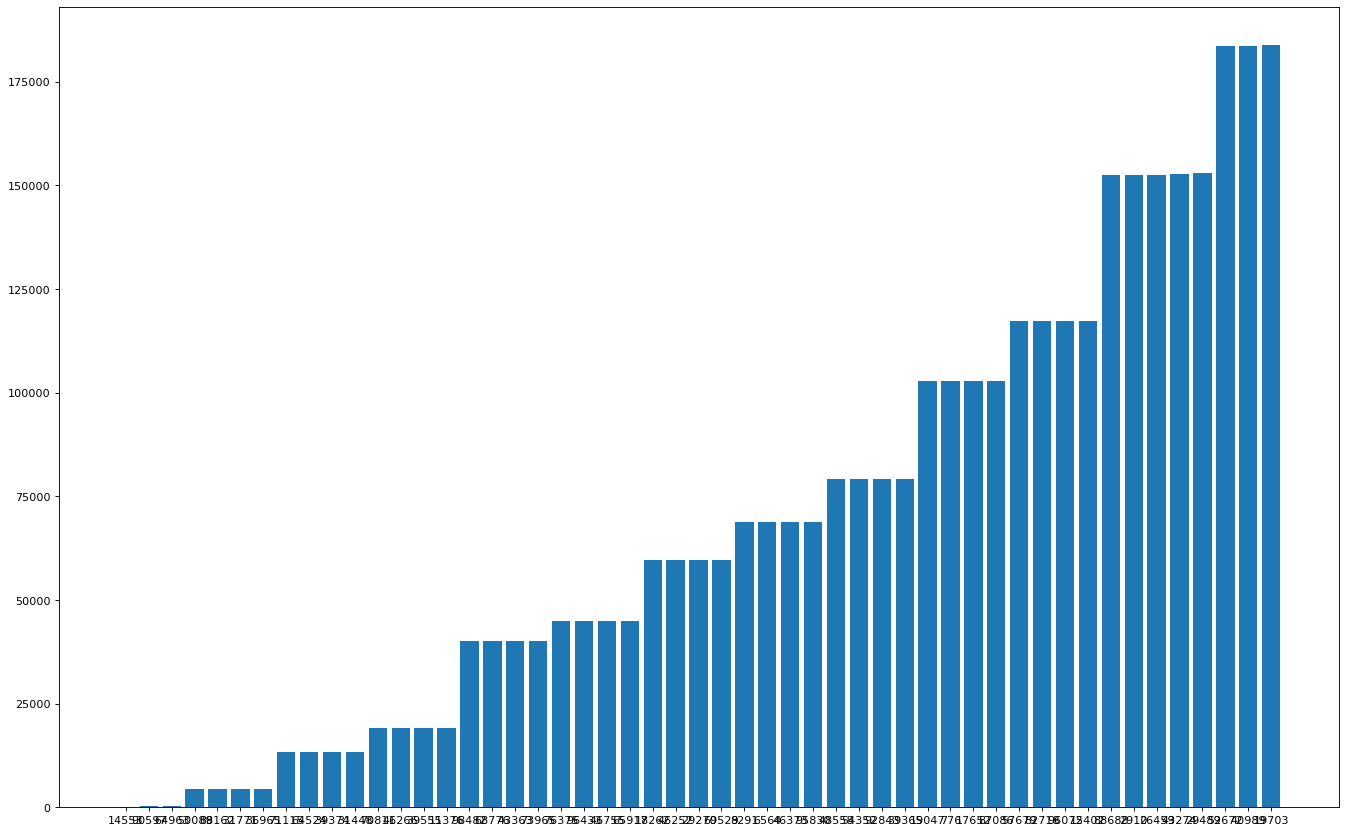

week 13


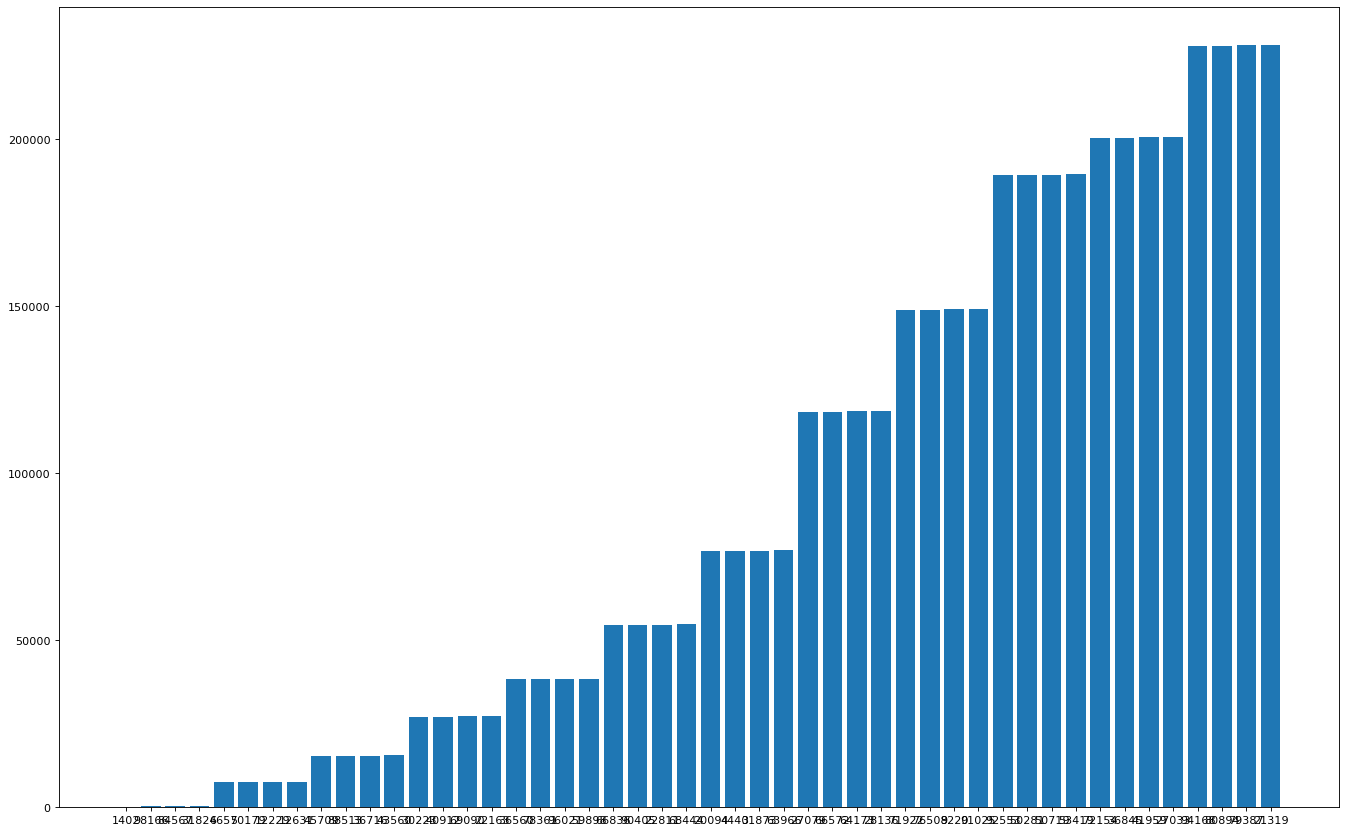

week 14


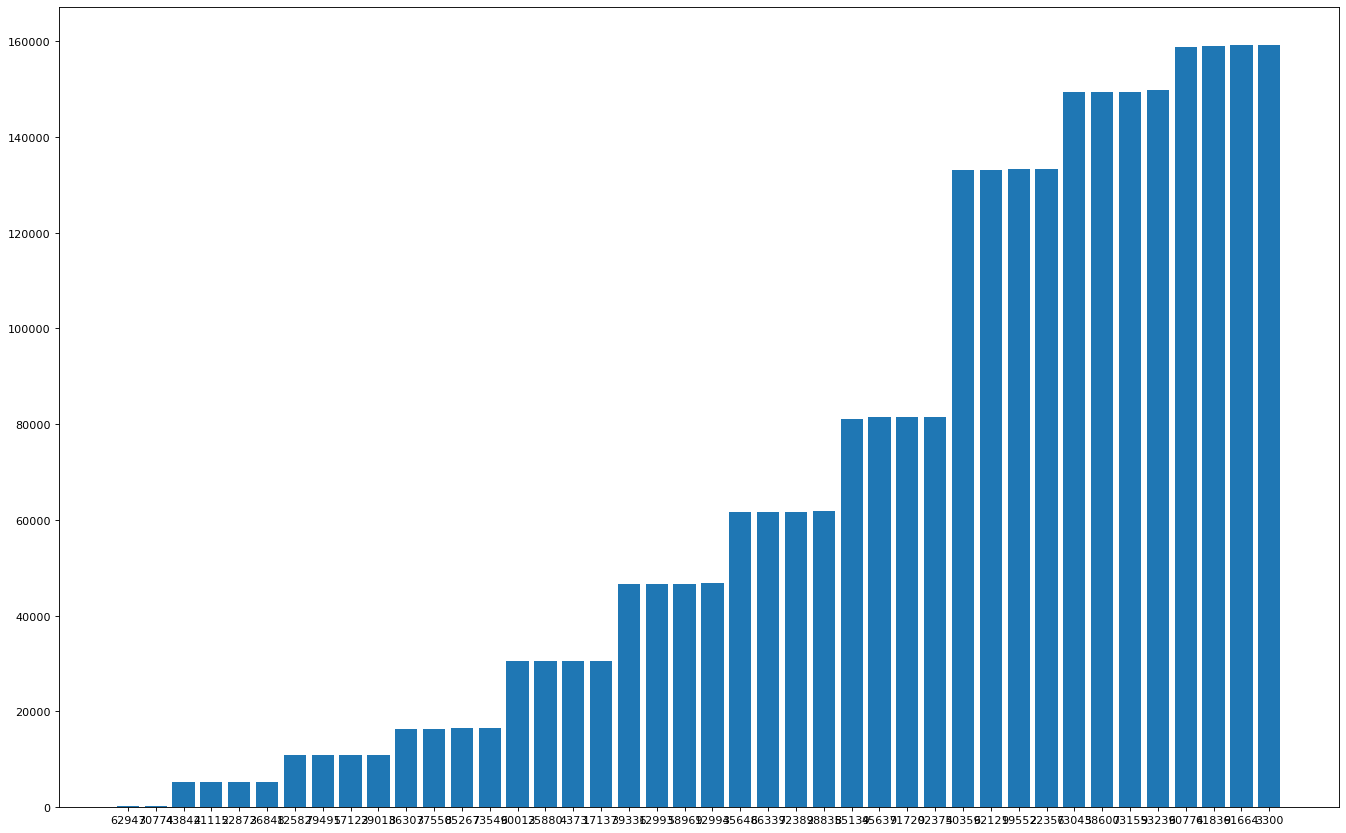

week 15


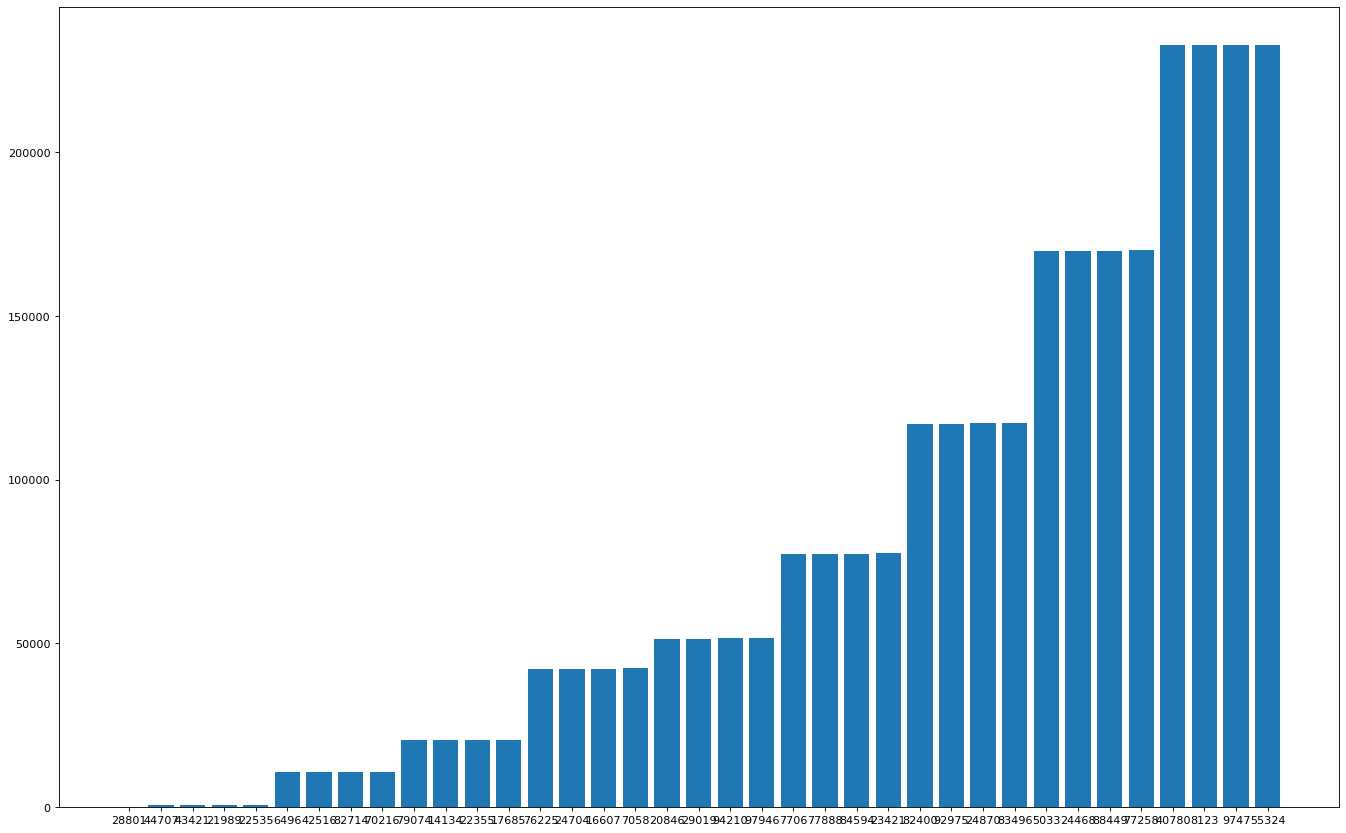

week 16


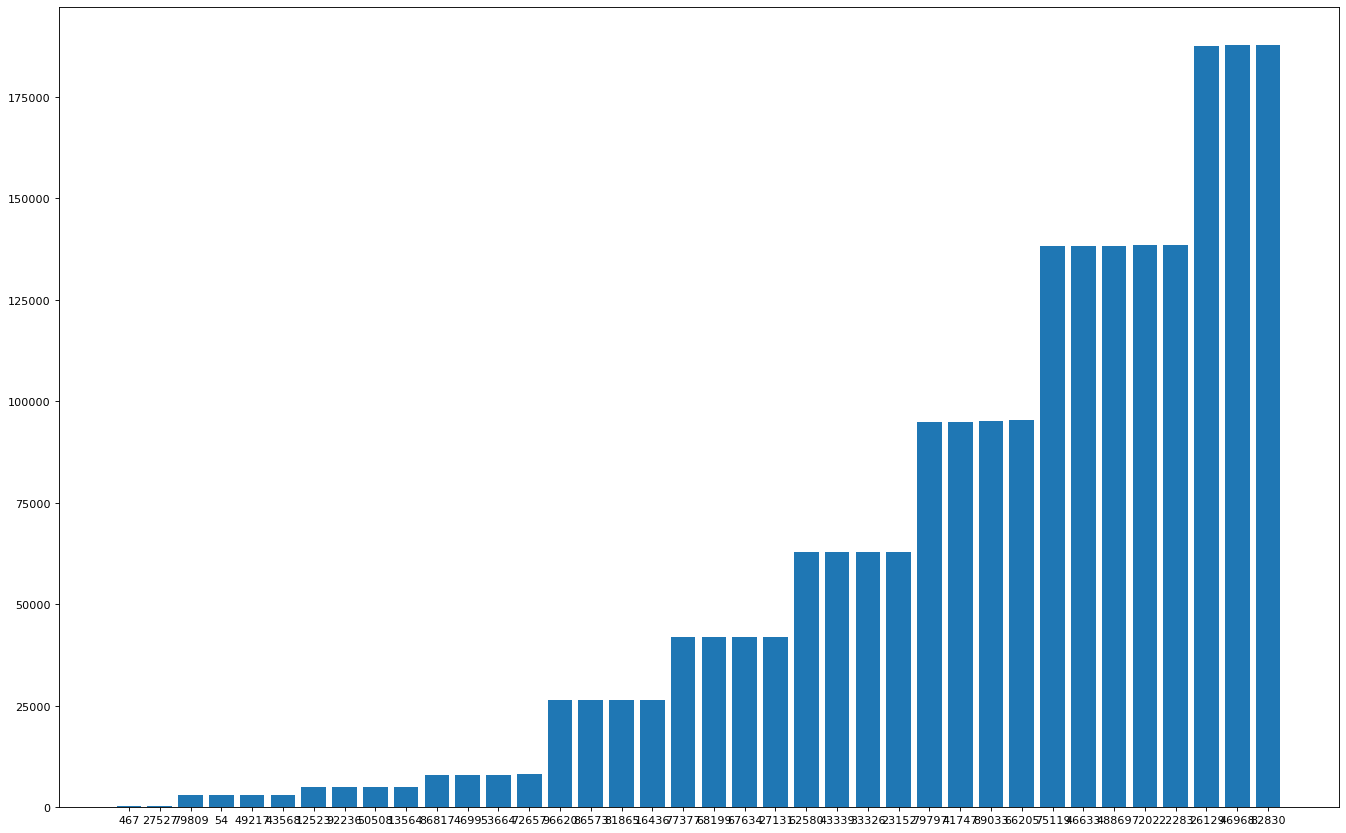

week 17


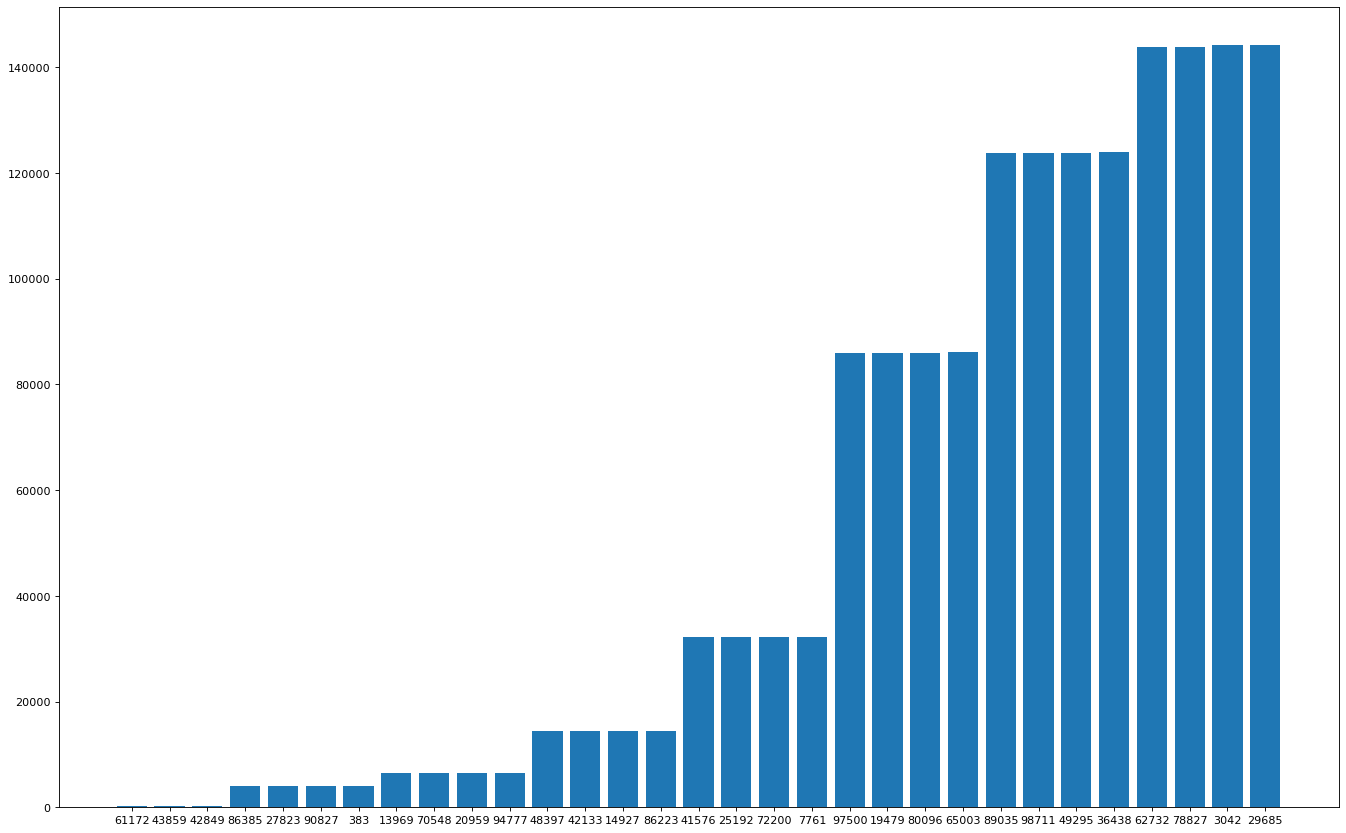

week 18


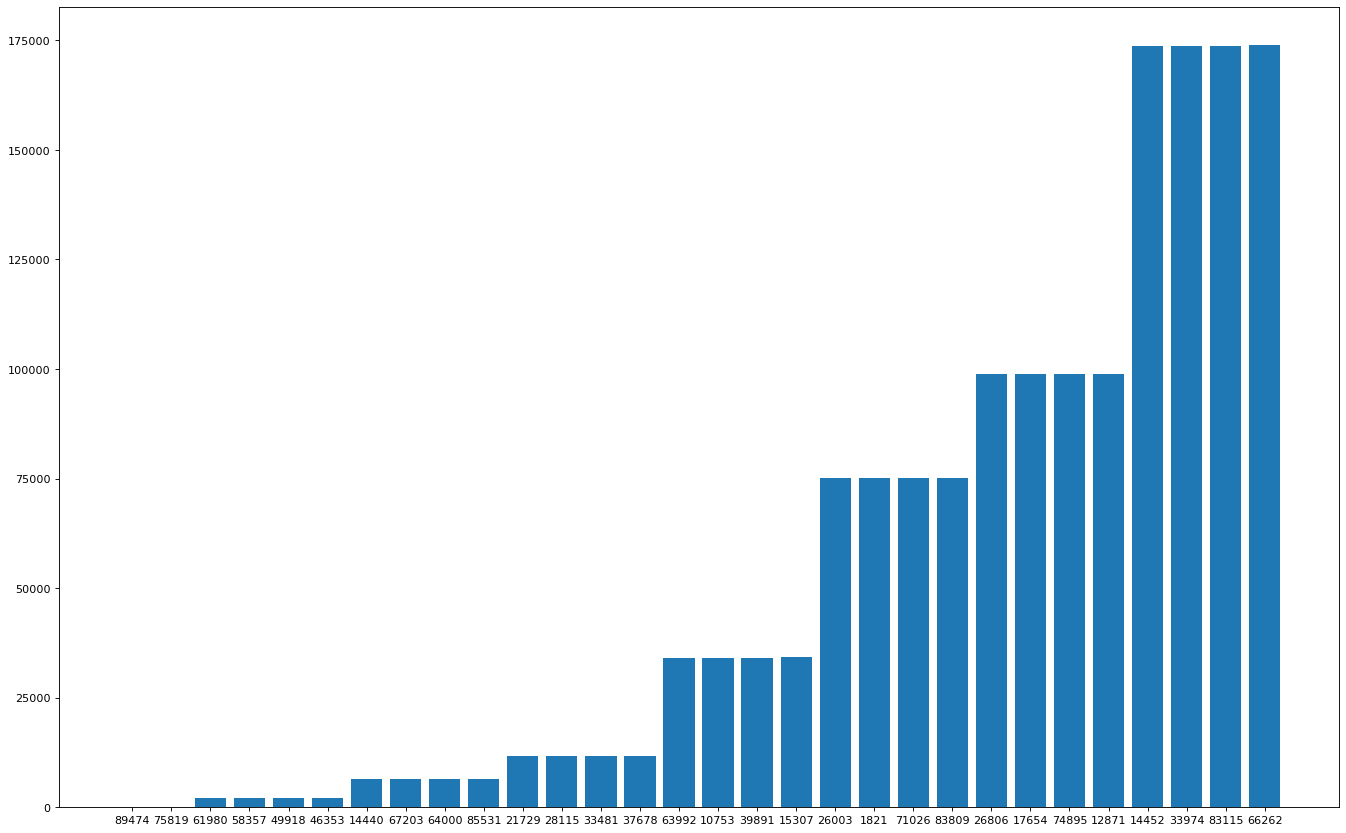

week 19


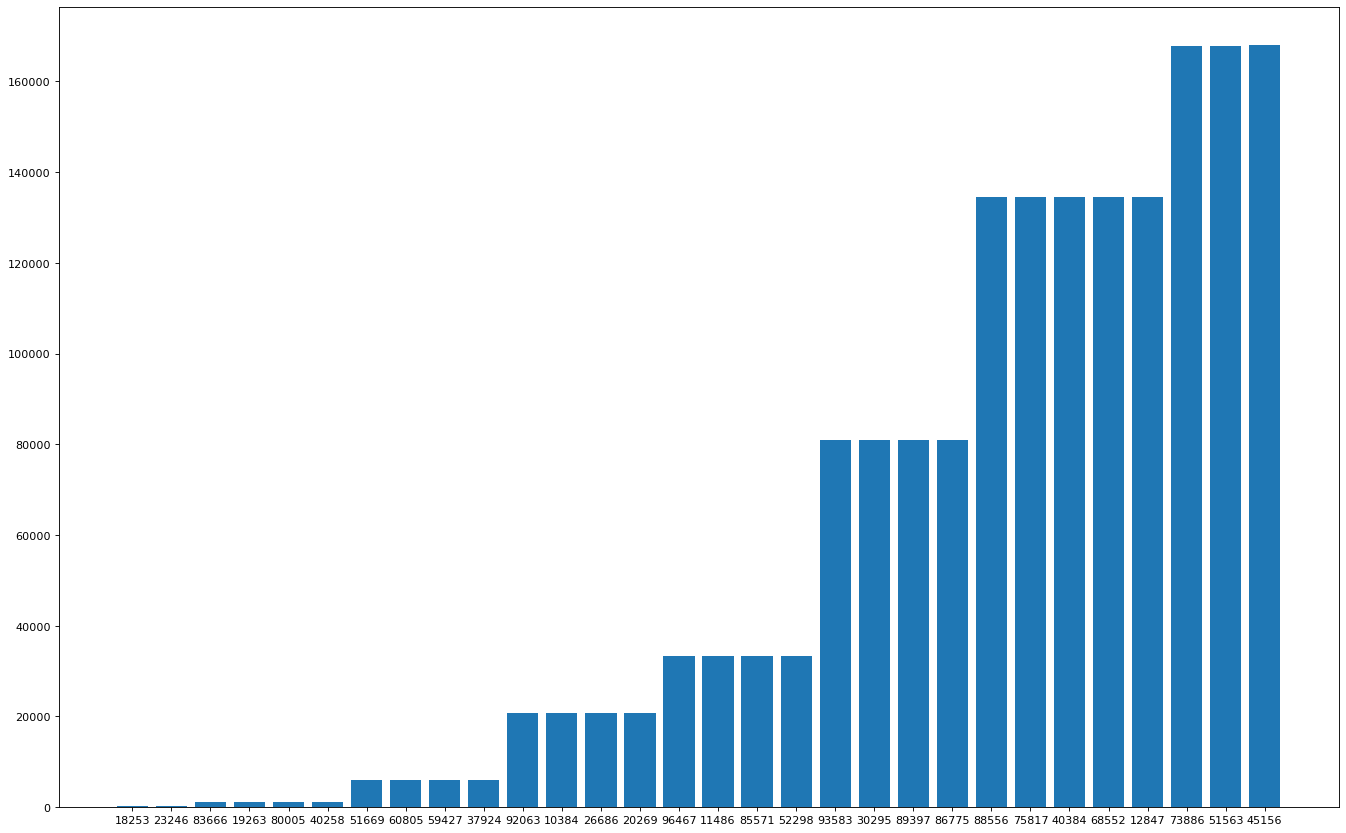

week 20


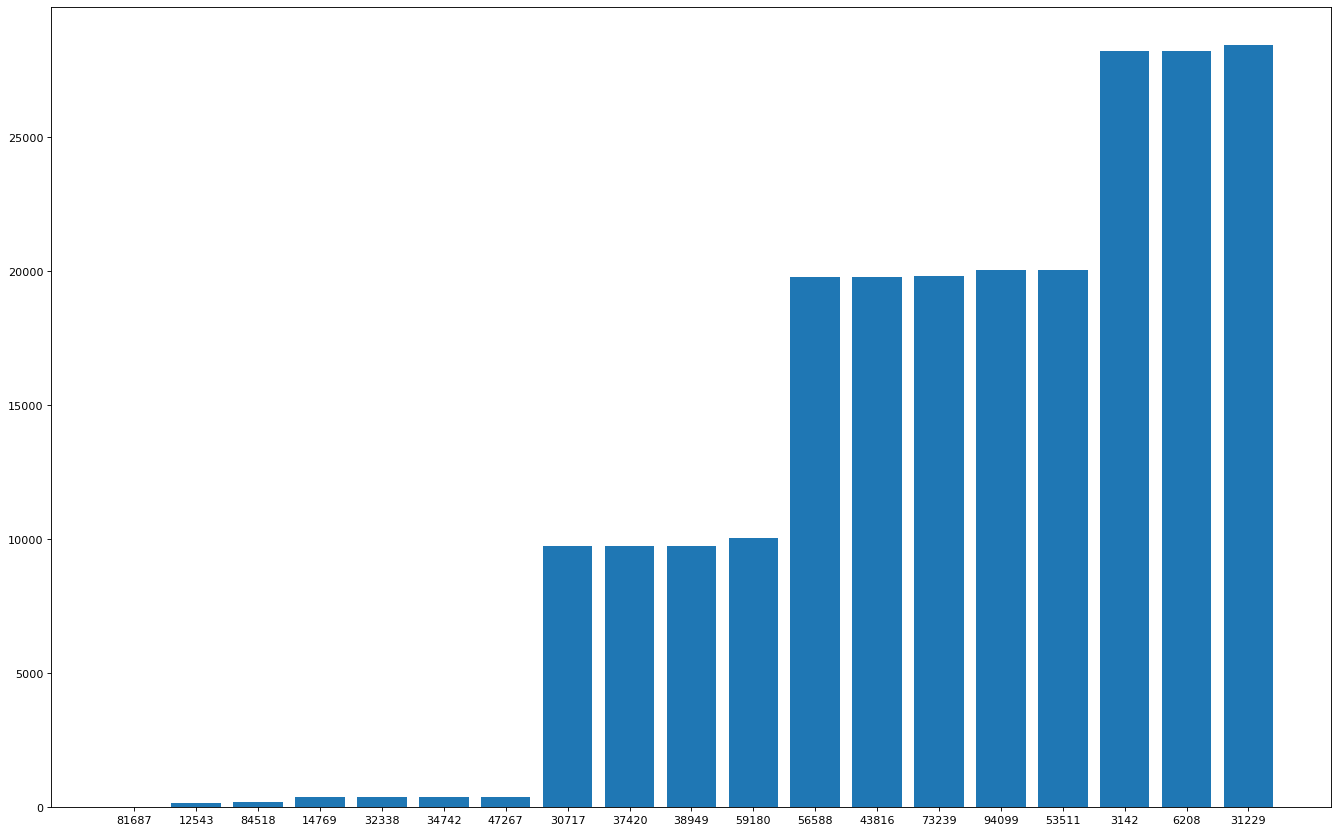

In [8]:
for i in range(10, 21):
    print("week "+str(i))
    klwaa = df[(df["week"]==i)&(df["id"]!="DEL")]
    plotocc(klwaa)

In [4]:

df1 = pd.read_csv('Databases/Original', sep='\t',
                 names=["gid", "datetime", "lat", "long"])
df1['datetime'] = pd.to_datetime(df1['datetime'])
df1['week'] = df1['datetime'].dt.week

C:\Users\soula\AppData\Local\Temp/ipykernel_1732/3834919895.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['week'] = df1['datetime'].dt.week


In [5]:
df1['epoch'] = (df1['datetime'] - dt.datetime(2015,1,1)).dt.total_seconds()

In [33]:
# df1

In [6]:
weeks=df1['week'].unique()
pd.set_option('display.max_rows', 500)
big={}
for w in weeks:
    print(f'week {w}')
    j=0
    dftmp1=df1[df1['week']==w]
    dftmp2=df2[df2['week']==w]
    name="2015-"+str(w)
    
    dfc=dftmp1.groupby("gid",as_index=False).size()
    dftmp1=dftmp1.groupby('gid', as_index=False).mean().round(2)
    dftmp1=dftmp1.merge(dfc, left_on='gid', right_on='gid').sort_values(['size','epoch','long','lat'])
    
    dfc2=dftmp2.groupby("id",as_index=False).size()
    dftmp2=dftmp2.groupby('id', as_index=False).mean().round(2)
    dftmp2=dftmp2.merge(dfc2, left_on='id', right_on='id').sort_values(['size','epoch','long','lat'])
    print(dftmp1)
    print(dftmp2)
    for i in dftmp2['id'].to_numpy():
        origId=str(dftmp1.iloc[j,0])
#         nearest_value=find_nearest(dftmp2['lat'].to_numpy(),dftmp1.iloc[j,4] )
        if origId in big:
            big[origId][name]=[str(dftmp2.iloc[j,0])]
        else:
            dictmp={}
            dictmp[name]=[str(dftmp2.iloc[j,0])]
            tmp_dict={
                origId:dictmp
            }
        big.update(tmp_dict)
        j+=1

week 10
    gid    lat   long  week       epoch    size
61   98   4.87  45.78  10.0  5627325.34     444
14   18   4.87  45.76  10.0  5441748.69     923
47   63   4.89  45.73  10.0  5584338.97    1221
62  107   4.87  45.77  10.0  5632052.44    3215
3     5   4.45  45.50  10.0  5608015.64    4110
48   66   4.79  45.77  10.0  5565684.22    5690
57   78   4.87  45.77  10.0  5539644.61    6285
25   32   4.88  45.78  10.0  5502001.22    9355
23   30   4.51  45.91  10.0  5572794.01   10788
56   77   4.87  45.72  10.0  5414612.27   10917
50   68   4.89  45.78  10.0  5534965.00   13932
22   29   4.45  46.32  10.0  5526724.45   17236
36   48   4.85  45.77  10.0  5508670.34   20391
63  110  -0.12  48.40  10.0  5516091.74   21330
27   35   4.87  45.78  10.0  5563698.39   23289
1     2   4.88  45.78  10.0  5634830.45   25958
9    13   3.74  45.58  10.0  5640119.96   26630
58   83   4.99  45.54  10.0  5531002.23   27795
54   73   4.44  45.86  10.0  5552778.83   28793
45   60   4.87  45.78  10.0  558

    gid    lat   long  week       epoch    size
19   34   4.83  45.76  12.0  6459921.36      14
34   63   6.34  44.49  12.0  6875499.62     989
20   38   4.88  45.78  12.0  6474629.33    3247
48   84   4.87  45.78  12.0  6781903.08    4396
35   65   4.87  45.78  12.0  6702341.47    6156
9    16   4.89  45.78  12.0  6454771.99    6711
30   55   4.88  45.78  12.0  6441161.40   12234
41   71   4.87  45.77  12.0  6751867.62   13371
46   78   4.88  45.77  12.0  6718049.19   13465
38   68   4.90  45.77  12.0  6670070.16   14882
40   70   4.88  45.77  12.0  6742790.47   16849
8    15   4.88  45.78  12.0  6418181.98   19224
45   77   4.84  45.74  12.0  6761451.98   26671
16   30   4.87  45.78  12.0  6718586.34   31469
50  107   4.88  45.79  12.0  6520379.20   37157
0     1   3.32  44.74  12.0  6738684.22   40078
6     9   4.84  45.77  12.0  6453448.03   41093
12   24   4.87  45.78  12.0  6726965.13   41134
24   44   4.88  45.77  12.0  6622093.55   41934
11   18   5.19  45.63  12.0  6882415.05 

    gid   lat   long  week       epoch    size
34   71  4.87  45.77  14.0  7956873.09     988
8    17  4.87  45.78  14.0  7709678.98    4532
22   52  4.87  45.78  14.0  7817545.03    5235
38   78  4.88  45.77  14.0  7836708.53    9085
6     9  4.84  45.77  14.0  8042104.10    9105
41   84  4.87  45.78  14.0  7996876.45    9264
12   29  4.87  45.79  14.0  7858295.89   10862
16   35  4.87  45.78  14.0  7862312.62   11006
24   54  4.87  45.78  14.0  7767874.42   11825
33   70  4.88  45.76  14.0  8040501.84   12361
31   68  4.89  45.78  14.0  7901027.24   16236
23   53  4.88  45.78  14.0  7623605.29   20825
10   27  4.82  45.77  14.0  7732630.85   23807
15   32  4.87  45.70  14.0  7927202.45   25996
27   63  4.83  45.78  14.0  7892539.27   30460
29   66  4.79  45.81  14.0  7957542.50   34575
19   49  4.88  45.78  14.0  7802587.57   40182
37   75  4.82  45.85  14.0  7971234.71   40854
17   41  5.47  45.19  14.0  7971319.69   46678
9    24  2.65  46.58  14.0  7937065.86   48783
11   28  4.77

    gid   lat   long  week        epoch    size
28   78  4.88  45.77  17.0   9680554.80    1306
30   87  4.79  45.93  17.0   9746617.95    3201
23   71  2.40  46.99  17.0   9582000.71    3327
27   77  4.84  45.73  17.0   9502499.42    4044
29   83  4.99  45.70  17.0   9455946.72    5260
9    26  4.87  45.76  17.0  10016241.44    5620
16   51  4.41  44.83  17.0   9704827.08    6113
7    18  4.92  46.29  17.0   9928560.41    6532
4     8  6.20  43.94  17.0   9578773.43    9248
19   66  4.80  45.77  17.0   9702233.19   12192
18   63  4.84  45.78  17.0   9677456.69   13402
13   41  2.28  48.90  17.0   9704305.71   14500
11   30  4.48  49.76  17.0   9583986.68   14736
6    17  4.95  45.07  17.0   9463742.07   16059
10   27  4.80  45.76  17.0   9654339.82   21337
21   68  4.88  45.78  17.0   9623884.40   32183
12   32  5.15  45.33  17.0   9884744.21   47601
0     1  4.87  45.78  17.0   9691597.06   69124
8    24  3.72  45.59  17.0   9686930.78   80211
25   73  4.71  45.77  17.0   9811675.65 

In [82]:
def findAno(dfOrig, dfAno, week):
    dfOrig = dfOrig.sort_values(by="epoch")
    name="2015-"+str(week)
    for i in range(0,len(dfOrig)):
        print(dfOrig.iloc[i,0],"-->",dfAno.iloc[i,0])
        guesses[str(dfOrig.iloc[i,0])][name].append(str(dfAno.iloc[i,0]))

In [105]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def findAno2(dfOrig, dfAno, week):
    name="2015-"+str(week)
    print(dfAno)
    for i in range(0,len(dfOrig)):
        idx = find_nearest(dfAno["epoch"],dfOrig.iloc[i,2])
        guesses[str(dfOrig.iloc[i,0])][name].append(str(dfAno.iloc[idx,0]))
#         dfAno.drop(dfAno.index[[idx]], inplace=True)


In [106]:
weeks=df1['week'].unique()
ids = df1["gid"].unique()
guesses = {}
for id in ids:
    guesses[str(id)]={}
    for w in weeks:
        name="2015-"+str(w)
        guesses[str(id)][name]=[]

pd.set_option('display.max_rows', 500)
for w in weeks:
    print(f'week {w}')
    j=0
    dftmp1=df1[df1['week']==w]
    dftmp2=df2[df2['week']==w]
    dfc=dftmp1.groupby("gid",as_index=False).size()
    dftmp1=dftmp1.groupby('gid', as_index=False).mean().round(2)
    dftmp1=dftmp1.merge(dfc, left_on='gid', right_on='gid').sort_values(['size','epoch','long','lat'])
    dfc2=dftmp2.groupby("id",as_index=False).size()
    dftmp2=dftmp2.groupby('id', as_index=False).mean().round(2)
    dftmp2=dftmp2.merge(dfc2, left_on='id', right_on='id').sort_values(['size','epoch','long','lat'])
    dftmp1= dftmp1[['gid','size','epoch']]
    dftmp2= dftmp2[['id','size','epoch']]
    var=0
    while(var<len(dftmp1)):
        sizeCommun = dftmp2.iloc[var,1]
        nextVar = len(dftmp2[dftmp2["size"]==sizeCommun])
        findAno2(dftmp1[var:var+nextVar],dftmp2[var:var+nextVar],w)
        var+=nextVar
        if(var>=len(dftmp2)):
            var=len(dftmp2)
print(guesses)

        

week 10
       id  size       epoch
39  70497   444  5492531.43
35  65098   444  5525069.27
15  41083   444  5538250.35
51  84295   444  5648417.92
       id  size       epoch
52  86470  4110  5488930.68
18   4546  4110  5497885.72
53  87295  4110  5516149.66
14  39987  4110  5589580.02
       id   size       epoch
46   7730  10788  5482914.24
0   12070  10788  5498286.21
44  76935  10788  5508992.99
12  39111  10788  5594390.77
       id   size       epoch
33   6464  20391  5509819.57
7   29871  20391  5516951.83
10  33947  20391  5548318.38
6   23936  20391  5631240.90
       id   size       epoch
30  60468  26630  5535560.47
17  44942  26630  5551774.31
62  98046  26630  5571341.11
58  94334  26630  5677115.46
       id   size       epoch
61  96368  29431  5507833.70
50  80285  29431  5526354.22
48  79335  29431  5535159.87
11  34647  29431  5643372.22
       id   size       epoch
43  75690  40400  5529561.57
32  61932  40400  5532858.31
60  95294  40400  5544267.31
55  88530  40400

       id  size       epoch
27  62947   302  7776348.67
9   30774   302  7863237.41
       id  size       epoch
5   22872  5235  7842680.26
12  36848  5235  7905660.20
16  41115  5235  7914479.92
18  43842  5235  7957842.21
       id   size       epoch
0   12582  10862  7846690.18
8   29013  10862  7902314.52
33  79491  10862  7932303.70
20  57123  10862  8032644.22
       id   size       epoch
13  37550  16236  7909347.41
36  86307  16236  7931755.84
       id   size       epoch
35  85267  16511  7705220.22
32  73549  16511  7777023.12
       id   size       epoch
6   25880  30460  7870378.92
3   17137  30460  7923638.47
23  60013  30460  7936988.93
17   4373  30460  7948995.31
       id   size       epoch
1   12993  46678  7888648.92
22  58969  46678  7968196.64
14  39336  46678  7980855.51
      id   size      epoch
2  12994  46792  7827095.5
       id   size       epoch
29  72389  61749  7834196.33
11  35648  61749  7925763.43
28  66339  61749  8037891.80
      id   size       epoc

In [108]:
import json
with open('dbmfin.json', 'w') as f:
    json.dump(guesses, f)

In [11]:
df1.size

207311094